In [48]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [49]:
# load data
path_detail_df = pd.read_csv("path_detail.csv")
player_metrics_df = pd.read_csv("player_metrics.csv")
print(player_metrics_df.columns)
print(path_detail_df.columns)

Index(['pid', 'fnm', 'lnm', 'hght', 'n', 'bx', 'by', 'bz', 'rt', 'rx', 'ry',
       'rz', 'rv', 'rvx', 'rvy', 'rvz', 'mnv', 'mnvt', 'mnvx', 'mnvy', 'mnvz',
       'mxv', 'mxvt', 'mxvx', 'mxvy', 'mxvz', 'ta1t', 'ta1x', 'ta1y', 'ta1z',
       'ta2t', 'ta2x', 'ta2y', 'ta2z', 'at1t', 'at1x', 'at1y', 'at1z', 'at2t',
       'at2x', 'at2y', 'at2z', 'lr1t', 'lr1x', 'lr1y', 'lr1z', 'lr2t', 'lr2x',
       'lr2y', 'lr2z', 'rl1t', 'rl1x', 'rl1y', 'rl1z', 'rl2t', 'rl2x', 'rl2y',
       'rl2z', 'pl', 'spl', 'plr'],
      dtype='object')
Index(['pid', 'fnm', 'lnm', 'hght', 't', 'ddst', 'cx', 'cy', 'cz', 'cvx',
       'cvy', 'cvz', 'cv', 'cax', 'cay', 'caz', 'ca', 'rt', 'dx', 'dy', 'dz',
       'd'],
      dtype='object')


In [111]:
#select relevant attributes
# aggregate the path data frame into manageable data using groupby()
agg_path_detail_df = path_detail_df.groupby('pid').agg({'cy': list, 'cz': list}).reset_index()
# print(agg_path_detail_df.shape, player_metrics_df.shape)
# agg_path_detail_df.head()
# # print(agg_path_detail_df)
# print(len(agg_path_detail_df.cy[2]))
# print(len(agg_path_detail_df.cz[2]))
# # metrics_attributes = ["pid", "fnm", "lnm", "by", "bz", "rt", "ry", "rz"]
# # player_metrics_df = player_metrics_df[metrics_attributes]
# # merged_df = pd.merge(agg_path_detail_df, player_metrics_df, on='pid', how='left')
# # print(merged_df)
condition = agg_path_detail_df['pid'].isin([201935, 203081, 201142, 201939])
# Extracting rows based on condition and selecting only the 'Player' column
agg_path_detail_df = agg_path_detail_df.loc[condition]
agg_path_detail_df.head()
print(len(agg_path_detail_df['cy'].tolist()[0]))
# print(agg_path_detail_df['cy'][1])

392


In [112]:
# Apply Min-Max scaling to each column

for col in agg_path_detail_df.keys():
    if (col == "pid"):
        print("here")
        continue
    
    for i in range(len(agg_path_detail_df[col])):
        
        # Convert the column data to numpy array for scaling
#         print(type(agg_path_detail_df[col][i]))
        data_array = np.array(agg_path_detail_df[col].tolist()[i]).reshape(-1, 1)
        # Initialize MinMaxScaler
        scaler = MinMaxScaler()
        # Fit the scaler to your data and transform it
        scaled_data = scaler.fit_transform(data_array)
        # Convert the scaled data back to a list
#         agg_path_detail_df[col].tolist()[i] = scaled_data.flatten().tolist()
#         print(scaled_data.flatten().tolist())
        print(len(scaled_data.flatten().tolist()))
#         print(type(agg_path_detail_df.at[i, col]))
        agg_path_detail_df[col][i] = scaled_data.flatten().tolist()
#         print("done ", i)

# agg_path_detail_df.head()
# print(type(agg_path_detail_df))
    



here
392
380
291
374
392
380
291
374


In [113]:
james_harden_x = agg_path_detail_df.loc[agg_path_detail_df['pid'] == 201935, 'cy']
james_harden_y = agg_path_detail_df.loc[agg_path_detail_df['pid'] == 201935, 'cz']
kevin_durant_x = agg_path_detail_df.loc[agg_path_detail_df['pid'] == 201142, 'cy']
kevin_durant_y = agg_path_detail_df.loc[agg_path_detail_df['pid'] == 201142, 'cz']

print(type(james_harden_x))
print(type(kevin_durant_x))

steph_curry_x = agg_path_detail_df.loc[agg_path_detail_df['pid'] == 201939, 'cy']
steph_curry_y = agg_path_detail_df.loc[agg_path_detail_df['pid'] == 201939, 'cz']
dame_lilla_x = agg_path_detail_df.loc[agg_path_detail_df['pid'] == 203081, 'cy']
dame_lilla_y = agg_path_detail_df.loc[agg_path_detail_df['pid'] == 203081, 'cz']

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


Text(0.5, 1.0, 'Kevin Durant vs. James Harden Shot')

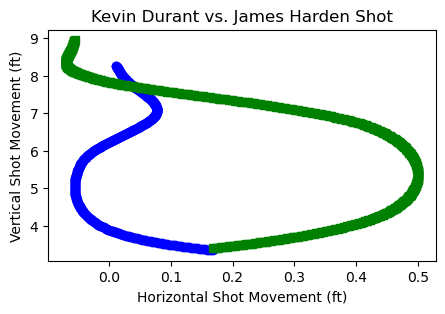

In [114]:
# Create a smaller figure
plt.figure(figsize=(5, 3))  # Adjust the values for width and height as needed

# Plotting the data with different colors
plt.plot(james_harden_x.tolist(), james_harden_y.tolist(), marker='o', linestyle='-', color='blue', label='Line 1')
plt.plot(kevin_durant_x.tolist(), kevin_durant_y.tolist(), marker='s', linestyle='--', color='green', label='Line 2')

# Adding labels and title
plt.xlabel('Horizontal Shot Movement (ft)')
plt.ylabel('Vertical Shot Movement (ft)')
plt.title('Kevin Durant vs. James Harden Shot')


Text(0.5, 1.0, 'Stephen Curry vs. Damian Lillard Shot')

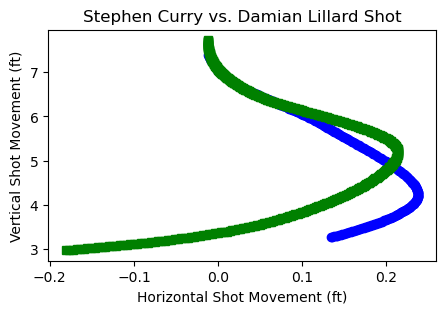

In [117]:
# Create a smaller figure
plt.figure(figsize=(5, 3))  # Adjust the values for width and height as needed

# Plotting the data with different colors
plt.plot(steph_curry_x.tolist(), steph_curry_y.tolist(), marker='o', linestyle='-', color='blue', label='Line 1')
plt.plot(dame_lilla_x.tolist(), dame_lilla_y.tolist(), marker='s', linestyle='--', color='green', label='Line 2')

# Adding labels and title
plt.xlabel('Horizontal Shot Movement (ft)')
plt.ylabel('Vertical Shot Movement (ft)')
plt.title('Stephen Curry vs. Damian Lillard Shot')
